In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import trange
import ROOT
import os,sys
from array import array

Welcome to JupyROOT 6.22/06


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.4
lumiTextOffset   = 0.2

cmsTextSize      = 0.45
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "41.5 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_*1.20, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.11)
tdrStyle.SetPadBottomMargin(0.11)
tdrStyle.SetPadLeftMargin(0.11)
tdrStyle.SetPadRightMargin(0.11)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(0.9)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## ratio function

In [4]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.0)
    h3.SetMaximum(2.10)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(105)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(20)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(20)

    return h3


## Fake lepton plot

- [Fake Rate](#Fake-Rate)
- [Apply Weight](#Apply-Weight)
- [Closure Test](#Closure-Test)

In [ ]:
plt.style.use(hep.style.CMS)
# import matplotlib as mpl
# mpl.style.use(hep.style.CMS)

In [5]:
@numba.njit
def sgn(num):
    if (num >= 0):
        return 1
    else:
        return -1

In [ ]:
# len(branches['gen_weight'])
# true_events = file['nEventsGenWeighted'].values()[0]

### Prescale HLT

#### Prescale

In [ ]:
def GetHist_Prescale(file, hist, isData):
    
    if isData:
        print('is Data')
        branches = uproot.open(file+':Events').arrays(['dilepton_mass','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
    else:
        print('is MC')
        branches = uproot.open(file+':Events').arrays(['dilepton_mass','gen_weight','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        weight = (1000*lumi*xsec) / true_events
    
    mll_cut1 = branches.loc[:,'dilepton_mass'] > 60
    mll_cut2 = branches.loc[:,'dilepton_mass'] < 120
    
    HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
    HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
    HLT_cut3 = branches.loc[:,'HLT_IsoMu24'] == True
    
    arrays = branches.loc[mll_cut1 & mll_cut2 & HLT_cut1,:]
    
    if isData:
        for i in trange(0, len(arrays['dilepton_mass']), desc=f'fill mll for: {file}'):
            hist.Fill(float(arrays['dilepton_mass'].values[i]))
    else:
        for i in trange(0, len(arrays['dilepton_mass']), desc=f'fill mll for: {file}'):
            hist.Fill(float(arrays['dilepton_mass'].values[i]),weight*sgn(arrays['gen_weight'].values[i]))
        
        
def Cal_Prescale_Factor(hist_DY, hist_DATA):
    
    # calculating sum sqrt error to get prescale factor
    SSE = float('inf')
    Prescale_Factor = 1
    for i in trange(0, 10000, 100):
        for j in trange(0, hist_DATA.GetNbinsX()):
            SSE_temp = np.square(hist_DATA.GetBinContent(j+1)-hist_DY.GetBinContent(j+1)) * hist_DATA.GetBinContent(j+1)
            if SSE_temp < SSE:
                SSE = SSE_temp
                Prescale_Factor = i
    print(f"Prescale_Factor: {Prescale_Factor}")
    return Prescale_Factor

In [ ]:
xbins = 60
xlow = 60
xup = 120

hist_DY_prescale = ROOT.TH1F("","",xbins,xlow,xup)
hist_DATA_prescale = ROOT.TH1F("","",xbins,xlow,xup)

file_DY_prescale = [
    '/eos/user/s/sdeng/WZG_analysis/DY_test/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018.root',
]

file_DATA_prescale = [
    '/eos/user/s/sdeng/WZG_analysis/DY_test/',
]

for file in file_DY_prescale:
    GetHist_Prescale(file_DY_prescale, hist_DY_prescale, 0)
for file in file_DATA_prescale:
GetHist_Prescale(file_DATA_prescale, hist_DATA_prescale, 1)

Prescale_Factor = Cal_Prescale_Factor(hist_DY_prescale, hist_DATA_prescale)

In [ ]:
def SetHistStyle_prescale(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetFillColor(color)
    hist.SetYTitle('events/bin')
    hist.SetXTitle('#M_ll [GeV]')
    hist.SetStats(0)
    
c1 = ROOT.TCanvas("","",1000,800)

hist1 = hist_DY_prescale.Clone()
hist2 = hist_DATA_prescale.Clone()

SetHistStyle_prescale(hist1, 2)
SetHistStyle_prescale(hist2, 0)

c1.Draw()
hist1.Draw("HIST")
hist2.Draw("ep SAME")

#### Validation

In [6]:
def AddHist_Prescale_valid(file, hist_pre1, hist_pre2, hist, hist_mu24):
    
#     branches = uproot.open(file+':Events').arrays(['mt','met','lepton_pt','lepton_pfRelIso04_all','lepton_pdgid','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
#     branches = uproot.open(file+':Events').arrays(['dilepton_mass','lepton1_pt','lepton1_pdgId','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL'], library='pd')
    branches = uproot.open(file+':Events').arrays(['HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt'], library='pd')
    
#     HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
#     HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
#     HLT_cut3 = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_cut1 = branches.loc[:,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut2 = branches.loc[:,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut3 = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    pf_cut = branches.loc[:,'is_lepton_tight'] == 1
    
#     pf_cut = branches.loc[:,'lepton_pfRelIso04_all'] < 0.4
#     mll_cut1 = branches.loc[:,'dilepton_mass'] > 60
#     mll_cut2 = branches.loc[:,'dilepton_mass'] < 120
    lepton_cut = abs(branches.loc[:,'lepton_pdgid']) == 11
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    mt_cut = branches.loc[:,'mt'] < 20
    met_cut = branches.loc[:,'met'] < 20
#     lepton_cut = abs(branches.loc[:,'lepton1_pdgId']) == 13
#     pt_edge = branches.loc[:,'lepton1_pt'] < 25
    
    arrays_pre1 = branches.loc[ HLT_cut1 & lepton_cut & pf_cut & mt_cut & met_cut,:]
    arrays_pre2 = branches.loc[ HLT_cut2 & lepton_cut & pf_cut & mt_cut & met_cut,:]
#     arrays_mu24 = branches.loc[HLT_cut3 & lepton_cut & pf_cut & mt_cut & met_cut,:]
    arrays = branches.loc[ lepton_cut & pf_cut & mt_cut & met_cut, :]
    
    for i in trange(0, len(arrays_pre1['lepton_pt']), desc=f'fill GeV region for HLT_Mu8_TrkIsoVVL in {file}'):
        hist_pre1.Fill(float(arrays_pre1['lepton_pt'].values[i]))
    for i in trange(0, len(arrays_pre2['lepton_pt']), desc=f'fill GeV region for HLT_Mu17_TrkIsoVVL in {file}'):
        hist_pre2.Fill(float(arrays_pre2['lepton_pt'].values[i]))
#     for i in trange(0, len(arrays_mu24['lepton_pt']), desc=f'fill for HLT_IsoMu24 in {file}'):
#         hist_mu24.Fill(float(arrays_mu24['lepton_pt'].values[i]))
    for i in trange(0, len(arrays['lepton_pt']), desc=f'fill for No HLT in {file}'):
        hist.Fill(float(arrays['lepton_pt'].values[i]))
    
    print("DONE")
    
    return True

In [7]:
xbins = 200
xlow = 0
xup = 200

hist_pre1 = ROOT.TH1F("","",xbins,xlow,xup)
hist_pre2 = ROOT.TH1F("","",xbins,xlow,xup)
hist = ROOT.TH1F("","",xbins,xlow,xup)
hist_mu24 = ROOT.TH1F("","",xbins,xlow,xup)

hist_pre1.Sumw2()
hist_pre2.Sumw2()
hist.Sumw2()
hist_mu24.Sumw2()

filelist_prescale_valid = [
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017D.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017E.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleEG_Run2017F.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2018D.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2018.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2016.root",
#     "/eos/user/s/sdeng/WZG_analysis/DY_test/SingleMuon_Run2016C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/test_diff_reco/SingleMuon_Run2016C-UL2016_MiniAODv1_NanoAODv2-v1.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-02Apr2020-v1_part1.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-02Apr2020-v1_part2.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-02Apr2020-v1_part3.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D-14Sep2018_ver2-v1_part1.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/DoubleMuon_Run2018D.root",
]

for file in filelist_prescale_valid:
    AddHist_Prescale_valid(file, hist_pre1, hist_pre2, hist, hist_mu24)


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root: 100%|██████████| 1018/1018 [00:05<00:00, 180.87it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root: 100%|██████████| 1685/1685 [00:00<00:00, 147026.20it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018A.root: 100%|██████████| 2570692/2570692 [00:14<00:00, 172019.56it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root: 100%|██████████| 2324/2324 [00:00<00:00, 131916.34it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root: 100%|██████████| 1776/1776 [00:00<00:00, 155617.20it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018B.root: 100%|██████████| 1258250/1258250 [00:07<00:00, 170372.66it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root: 100%|██████████| 2294/2294 [00:00<00:00, 142819.26it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root: 100%|██████████| 1882/1882 [00:00<00:00, 150410.25it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018C.root: 100%|██████████| 1237157/1237157 [00:06<00:00, 180408.97it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root: 100%|██████████| 3560/3560 [00:00<00:00, 173808.59it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root: 100%|██████████| 2896/2896 [00:00<00:00, 177479.61it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part1.root: 100%|██████████| 2284118/2284118 [00:13<00:00, 174283.69it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root: 100%|██████████| 3118/3118 [00:00<00:00, 150579.62it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root: 100%|██████████| 2489/2489 [00:00<00:00, 145579.10it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part2.root: 100%|██████████| 1940030/1940030 [00:11<00:00, 175114.00it/s]


DONE


fill GeV region for HLT_Mu8_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root: 100%|██████████| 4512/4512 [00:00<00:00, 143667.15it/s]
fill GeV region for HLT_Mu17_TrkIsoVVL in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root: 100%|██████████| 3420/3420 [00:00<00:00, 144952.70it/s]
fill for No HLT in /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/EGamma_Run2018D_part3.root: 100%|██████████| 2888173/2888173 [00:16<00:00, 176879.71it/s]


DONE


59.7 fb^{-1} (13 TeV)


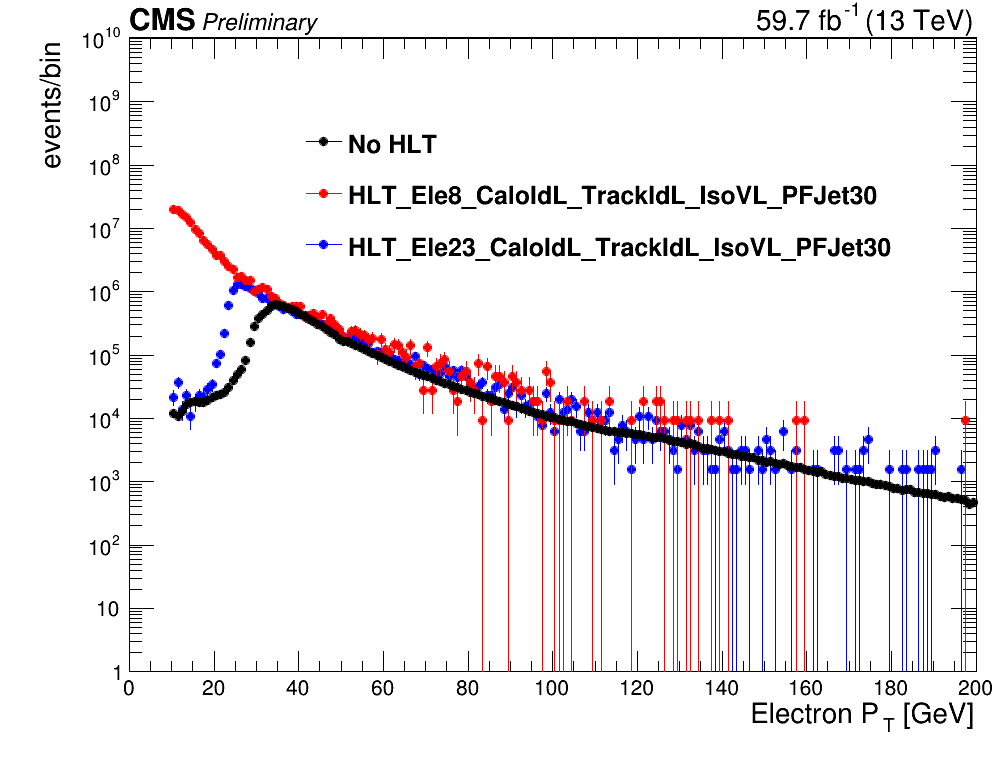

In [9]:
def SetHistStyle_prescale_valid(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetLineColor(color)
    hist.SetYTitle('events/bin')
    hist.SetXTitle('Electron P_{T} [GeV]')
    hist.SetStats(0)
    
c1 = ROOT.TCanvas("","",1000,800)

SetHistStyle_prescale_valid(hist, 1)
SetHistStyle_prescale_valid(hist_mu24, 11)
SetHistStyle_prescale_valid(hist_pre1, 2)
SetHistStyle_prescale_valid(hist_pre2, 4)

hist_pre1_clone = hist_pre1.Clone()
hist_pre2_clone = hist_pre2.Clone()
hist_clone = hist.Clone()
hist_mu24_clone = hist_mu24.Clone()
# hist_pre1_clone.Scale(59.7/0.00856)
# hist_pre2_clone.Scale(59.7/0.04578)
# hist_pre1_clone.Scale(36.9/0.00780)
# hist_pre2_clone.Scale(36.9/0.21675)

hist_pre1_clone.Scale(59.7/0.00641)
hist_pre2_clone.Scale(59.7/0.03891)
# hist_pre1_clone.Scale(41.54/0.00397)
# hist_pre2_clone.Scale(41.54/0.04347)

c1.Draw()
hist_pre2_clone.Draw("pe SAME")
hist_pre1_clone.Draw("SAME pe")
hist_clone.Draw("pe SAME")
# hist_mu24_clone.Draw("pe SAME")

hist_pre2_clone.SetMinimum(1)
# hist_pre2_clone.SetMaximum(hist_pre2_clone.GetMaximum()*1.8)
hist_pre2_clone.SetMaximum(10000000000)
# hist_pre2_clone.SetMaximum(hist_pre2_clone.GetMaximum()*1.8)
# Line = ROOT.TLine(25, c1.GetUymin(), 25, hist_pre2_clone.GetMaximum())
# Line = ROOT.TLine(25, c1.GetUymin(), 25, hist_mu24_clone.GetMaximum()*1.0)
# Line.SetLineStyle(2)
# Line.Draw("SAME")
# Line.Print()

legend = ROOT.TLegend(0.30, 0.65, 0.50, 0.85)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
legend.AddEntry(hist,'No HLT')
# legend.AddEntry(hist_mu24,'HLT_IsoMu24')
legend.AddEntry(hist_pre1,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30')
legend.AddEntry(hist_pre2,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30')
legend.Draw("SAME")

ROOT.gPad.SetLogy()
# ROOT.gPad.SetGrid()
CMS_lumi(c1, 0, 0)
# c1.SaveAs('Fake_Lepton/PreScale_valid_Mu_addfactor_2018.pdf')
# c1.SaveAs('Fake_Lepton/PreScale_valid_Mu_addfactor_2018.png')

### Fake Template distribution

In [53]:
def AddHist_FTdist(file, branch, hist_pre1, hist_pre2, isData, xsec):
    
    if isData:
        print('is Data')
        init_branches = ['is_lepton_tight','jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all',\
                                                       'HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt',\
                                                      'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30']
        if not (branch in init_branches):
            init_branches.append(branch)
        branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
#         branches = uproot.open(file+':Events').arrays(['jet_pt','HLT_Ele32_WPTight_Gsf','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt'], library='pd')
    else:
        print('is MC')
        init_branches = ['is_lepton_tight','jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all','lepton_gen_matching','gen_weight',\
                                                       'HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt',\
                                                      'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30']
        if not (branch in init_branches):
            init_branches.append(branch)
        branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
#         branches = uproot.open(file+':Events').arrays([,'HLT_Ele32_WPTight_Gsf','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_gen_matching','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt','gen_weight'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
#         print (true_events)
#         weight_lowpt = (1000*xsec*0.00290) / true_events
#         weight_highpt = (1000*xsec*0.06594) / true_events
        weight_lowpt = (1000*xsec*0.00397) / true_events
        weight_highpt = (1000*xsec*0.04347) / true_events
        lepton_gen_cut1 = branches.loc[:,'lepton_gen_matching'] == 1
        lepton_gen_cut2 = branches.loc[:,'lepton_gen_matching'] == 15
        
#     HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
#     HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
    HLT_cut1 = branches.loc[:,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut2 = branches.loc[:,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    
    met_cut = branches.loc[:,'met'] < 2000
    mt_cut = branches.loc[:,'mt'] < 20
    lepton_cut = abs(branches.loc[:,'lepton_pdgid']) == 11
#     pf_cut = branches.loc[:,'lepton_pfRelIso04_all'] < 0.4
    pf_cut = branches.loc[:,'is_lepton_tight'] == 0
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    jet_pt = branches.loc[:,'jet_pt'] >35
    
    if isData:
        arrays_0_25 = branches.loc[HLT_cut1 & lepton_cut & pf_cut & pt_edge & met_cut & mt_cut & jet_pt,:] 
        arrays_25_Inf = branches.loc[HLT_cut2 & lepton_cut & pf_cut & ~pt_edge & met_cut & mt_cut & jet_pt,:] 
        for i in trange(0, len(arrays_0_25[branch]), desc=f'fill pt<25 part for {file}'):
            hist_pre1.Fill(float(arrays_0_25[branch].values[i]))
        for i in trange(0, len(arrays_25_Inf[branch]), desc=f'fill pt>25 part for {file}'):
            hist_pre2.Fill(float(arrays_25_Inf[branch].values[i]))
    
    else:
        if ('TTbar' in file) or ('QCD' in file):
            print ("QCD process\n")
            arrays_0_25 = branches.loc[HLT_cut1 & lepton_cut & pf_cut & pt_edge & met_cut & mt_cut & jet_pt,:] 
            arrays_25_Inf = branches.loc[HLT_cut2 & lepton_cut & pf_cut & ~pt_edge & met_cut & mt_cut & jet_pt,:] 
        else:
            arrays_0_25 = branches.loc[HLT_cut1 & lepton_cut & pf_cut & pt_edge & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:] 
            arrays_25_Inf = branches.loc[HLT_cut2 & lepton_cut & pf_cut & ~pt_edge & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:] 
        for i in trange(0, len(arrays_0_25[branch]), desc=f'fill pt<25 part for {file}'):
            hist_pre1.Fill(float(arrays_0_25[branch].values[i]), weight_lowpt*sgn(arrays_0_25['gen_weight'].values[i]))
        for i in trange(0, len(arrays_25_Inf[branch]), desc=f'fill pt>25 part for {file}'):
            hist_pre2.Fill(float(arrays_25_Inf[branch].values[i]), weight_highpt*sgn(arrays_25_Inf['gen_weight'].values[i]))
        
    print("DONE")
    return True
    

In [55]:
xbins = 20
xlow = 0
xup = 200
branch = 'met'

ptbins = [10, 13, 16, 20, 24, 28, 35, 45, 200]

hist_dist1_DATA = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_DATA = ROOT.TH1D("","",xbins, xlow, xup)

# hist_dist1_DATA = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_DATA = ROOT.TH1D("","",8, array('d',ptbins))

hist_dist1_DATA.Sumw2()
hist_dist2_DATA.Sumw2()

file_list = [
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017C_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017D_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017E_0000.root',
#     '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017F_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017C_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017D_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017E_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017F_0000.root',
]

for file in file_list:
    AddHist_FTdist(file, branch, hist_dist1_DATA, hist_dist2_DATA, 1, 1)

hist_dist1_WJets = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_WJets = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist1_ZJets = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_ZJets = ROOT.TH1D("","",xbins, xlow, xup)

# hist_dist1_WJets = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_WJets = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist1_ZJets = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_ZJets = ROOT.TH1D("","",8, array('d',ptbins))

hist_dist1_WJets.Sumw2()
hist_dist1_WJets.Sumw2()
hist_dist1_ZJets.Sumw2()
hist_dist1_ZJets.Sumw2()

file_WJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
file_ZJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
file_ZJets2 = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'

AddHist_FTdist(file_WJets, branch, hist_dist1_WJets, hist_dist2_WJets, 0, 61526.7)
AddHist_FTdist(file_ZJets, branch, hist_dist1_ZJets, hist_dist2_ZJets, 0, 6077.22)
AddHist_FTdist(file_ZJets2, branch, hist_dist1_ZJets, hist_dist2_ZJets, 0, 18610)

hist_dist1_ttbar = ROOT.TH1D("","",xbins, xlow, xup)
hist_dist2_ttbar = ROOT.TH1D("","",xbins, xlow, xup)
# hist_dist1_ttbar = ROOT.TH1D("","",8, array('d',ptbins))
# hist_dist2_ttbar = ROOT.TH1D("","",8, array('d',ptbins))

hist_dist1_ttbar.Sumw2()
hist_dist1_ttbar.Sumw2()

# file_ttbar = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/TTbar_13TeV_TuneCP5_Pythia8_2018.root'
# AddHist_FTdist(file_ttbar, hist_dist1_ttbar, hist_dist2_ttbar, 0, 831.76)

# file_list_QCD = [
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2017_0000.root"
# ]

# xsec_list_QCD = [
#     2799000,
#     2526000,
#     1362000,
#     376600,
#     88930,
#     21230,
#     7055,
#     619.3,
#     59.24,
#     18.21,
#     3.275,
#     1.078
# ]


file_list_QCD = [
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-20to30_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-30to50_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-50to80_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-80to120_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-120to170_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-170to300_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
   "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-300toInf_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root",
]

xsec_list_QCD = [
    1327000,
    4908000,
    6396000,
    1989000,
    366500,
    66490,
    16480,
    1097
]
for i in range(len(file_list_QCD)):
    AddHist_FTdist(file_list_QCD[i], branch, hist_dist1_ttbar, hist_dist2_ttbar, 0, xsec_list_QCD[i])
    

is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017C_0000.root: 100%|██████████| 9886/9886 [00:00<00:00, 198067.75it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017C_0000.root: 100%|██████████| 12508/12508 [00:00<00:00, 198696.96it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017D_0000.root: 100%|██████████| 2458/2458 [00:00<00:00, 186352.86it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017D_0000.root: 100%|██████████| 6311/6311 [00:00<00:00, 156847.74it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017E_0000.root: 100%|██████████| 3453/3453 [00:00<00:00, 195554.09it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017E_0000.root: 100%|██████████| 8467/8467 [00:00<00:00, 191896.71it/s]


DONE
is Data


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017F_0000.root: 100%|██████████| 8865/8865 [00:00<00:00, 195240.12it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017F_0000.root: 100%|██████████| 19657/19657 [00:00<00:00, 196526.61it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 4485/4485 [00:00<00:00, 103932.98it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 2562/2562 [00:00<00:00, 103385.71it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 35629/35629 [00:00<00:00, 84158.05it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 22943/22943 [00:00<00:00, 85322.24it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 2993/2993 [00:00<00:00, 84860.86it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 457/457 [00:00<00:00, 80106.86it/s]


DONE
is MC


fill pt<25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root: 100%|██████████| 211/211 [00:00<00:00, 93938.88it/s]
fill pt>25 part for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-15to20_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root: 100%|██████████| 11/11 [00:00<00:00, 34049.70it/s]

QCD process

DONE
is MC


FileNotFoundError: file not found

    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/QCD_Pt-20to30_EMEnriched_TuneCP5_13TeV_pythia8_2017_0000.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [ ]:
c1 = ROOT.TCanvas("","",1000,800)

def SetHistStyle_dist(hist, color, isData):
    if isData:
        hist.SetMarkerStyle(20)
        hist.SetMarkerColor(color)
    else:
        hist.SetFillColor(color)
        hist.SetFillStyle(4100)
        hist.SetLineColor(color)
        hist.SetLineStyle(0)
        hist.SetLineWidth(0)
    hist.SetYTitle('events/bin')
    hist.SetXTitle('MET [GeV]')
    # Adjust y-axis settings
    # hist.GetYaxis().SetNdivisions(105)
    hist.GetYaxis().SetTitleSize(25)
    hist.GetYaxis().SetTitleFont(43)
    hist.GetYaxis().SetTitleOffset(1.40)
    hist.GetYaxis().SetLabelFont(43)
    hist.GetYaxis().SetLabelSize(25)

    # Adjust x-axis settings
    hist.GetXaxis().SetTitleSize(25)
    hist.GetXaxis().SetTitleFont(43)
    hist.GetXaxis().SetTitleOffset(5.0)
    hist.GetXaxis().SetLabelFont(43)
    hist.GetXaxis().SetLabelSize(25)
    hist.SetStats(0)


SetHistStyle_dist(hist_dist1_WJets, 22, 0)
SetHistStyle_dist(hist_dist2_WJets, 22, 0)
SetHistStyle_dist(hist_dist1_ZJets, 27, 0)
SetHistStyle_dist(hist_dist2_ZJets, 27, 0)
SetHistStyle_dist(hist_dist1_ttbar, 32, 0)
SetHistStyle_dist(hist_dist2_ttbar, 32, 0)
SetHistStyle_dist(hist_dist1_DATA, 1, 1)
SetHistStyle_dist(hist_dist2_DATA, 1, 1)

hist_dist_WJets = hist_dist1_WJets.Clone()
hist_dist_WJets.Add(hist_dist2_WJets)
SetHistStyle_dist(hist_dist_WJets, 22, 0)
hist_dist_ZJets = hist_dist1_ZJets.Clone()
hist_dist_ZJets.Add(hist_dist2_ZJets)
SetHistStyle_dist(hist_dist_ZJets, 27, 0)
hist_dist_ttbar = hist_dist1_ttbar.Clone()
hist_dist_ttbar.Add(hist_dist2_ttbar)
SetHistStyle_dist(hist_dist_ttbar, 32, 0)

hs_dist = ROOT.THStack("",";M_{T,e} [GeV];events/bin")
hs_dist.Add(hist_dist_ZJets)
hs_dist.Add(hist_dist_WJets)
hs_dist.Add(hist_dist_ttbar)

MC_err = ROOT.TH1D("","",xbins,xlow,xup)
# MC_err = ROOT.TH1D("","",8,array('d',ptbins))
MC_err.Sumw2()
MC_err.Add(hist_dist1_WJets)
MC_err.Add(hist_dist2_WJets)
MC_err.Add(hist_dist1_ZJets)
MC_err.Add(hist_dist2_ZJets)
MC_err.Add(hist_dist1_ttbar)
MC_err.Add(hist_dist2_ttbar)
MC_err.SetFillColor(ROOT.kGray+2)
MC_err.SetFillStyle(3345)
MC_err.SetMarkerSize(0.)
MC_err.SetMarkerColor(ROOT.kGray+2)
MC_err.SetLineWidth(2)
MC_err.SetLineColor(0)
MC_err.SetStats(0)

hs_data = ROOT.TH1D("","",xbins,xlow,xup)
# hs_data = ROOT.TH1D("","",8,array('d',ptbins))
hs_data.Add(hist_dist1_DATA)
hs_data.Add(hist_dist2_DATA)
SetHistStyle_dist(hs_data, 1, 1)

legend = ROOT.TLegend(0.55, 0.45, 0.70, 0.75)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
# legend.AddEntry(hist_dist1_DATA,'Double Muon 2018')
legend.AddEntry(hist_dist1_DATA,f'SingleElectron 2017: {format(hs_data.GetSumOfWeights(), ".2f")}')
legend.AddEntry(hist_dist1_WJets,f'WJetsToLNu: {format(hist_dist_WJets.GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(hist_dist1_ZJets,f'DYToLNu: {format(hist_dist_ZJets.GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(hist_dist1_ttbar,f'QCD-EMEnriched: {format(hist_dist_ttbar.GetSumOfWeights(), ".2f")}','F')

c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

# draw everything
pad1.cd()
# hs_data.GetYaxis().SetMaxDigits(3)
hs_dist.Draw("HIST")
hs_dist.SetMaximum(10000000)
hs_dist.SetMinimum(10)
# hs_dist.GetXaxis().SetRangeUser(10,60)
hs_dist.GetXaxis().SetLabelSize(0)
hs_data.Draw("ep SAME")
MC_err.Draw("e2 SAME")
legend.Draw("SAME")
ROOT.gPad.SetLogy()
ROOT.gPad.RedrawAxis()


# h1.GetXaxis().SetLabelSize(0)
pad2.cd()
h3 = createRatio(hs_data, MC_err)
h4 = createRatio(MC_err, MC_err)
h3.Draw("ep")
# h3.GetXaxis().SetRangeUser(10,60)
h4.Draw("e2 SAME")
ROOT.gPad.RedrawAxis()

CMS_lumi(pad1, 0, 0)
# c1.SaveAs('Fake_Lepton/2017/eta_TightElectron_dist_MR_2017_new.pdf')
# c1.SaveAs('Fake_Lepton/2017/eta_TightElectron_dist_MR_2017_new.png')
c1.SaveAs('Fake_Lepton/2017/MET_FakeElectron_dist_MR_2017_new.pdf')
c1.SaveAs('Fake_Lepton/2017/MET_FakeElectron_dist_MR_2017_new.png')

#### SF
Need to calculate mt distribution in EWK CR first before this part

In [107]:
bin_left = 41
bin_right = 61

WJets_yields = hist_dist1_WJets.Integral(bin_left,bin_right) + hist_dist2_WJets.Integral(bin_left,bin_right)
ZJets_yields = hist_dist1_ZJets.Integral(bin_left,bin_right) + hist_dist2_ZJets.Integral(bin_left,bin_right)
ttbar_yields = hist_dist1_ttbar.Integral(bin_left,bin_right) + hist_dist2_ttbar.Integral(bin_left,bin_right)
data_yields = hist_dist1_DATA.Integral(bin_left,bin_right) + hist_dist2_DATA.Integral(bin_left,bin_right)

print (hist_dist1_WJets.FindBin(80),hist_dist1_WJets.FindBin(120))
print (f"WJets yields in EWK CR: {WJets_yields}")
print (f"ZJets yields in EWK CR: {ZJets_yields}")
print (f"QCD yields in EWK CR: {ttbar_yields}")
print (f"data yields in EWK CR: {data_yields}")
print (f"SF = {data_yields} / {WJets_yields + ZJets_yields + ttbar_yields}  = {data_yields/(WJets_yields+ZJets_yields)}")

41 61
WJets yields in EWK CR: 74504.56840629624
ZJets yields in EWK CR: 2901.190794422255
QCD yields in EWK CR: 4391.856033408049
data yields in EWK CR: 87970.0
SF = 87970.0 / 81797.61523412654  = 1.1364787440671915


#### pt-binned SF
Need to calculate pt-binned histogram in EWK CR first before calculating this part.
For convenient, can just simply set the last bin as [45,200]

1.0064456029986655
0.005266287511828886
1.1394860752481015
0.0076018056871837115


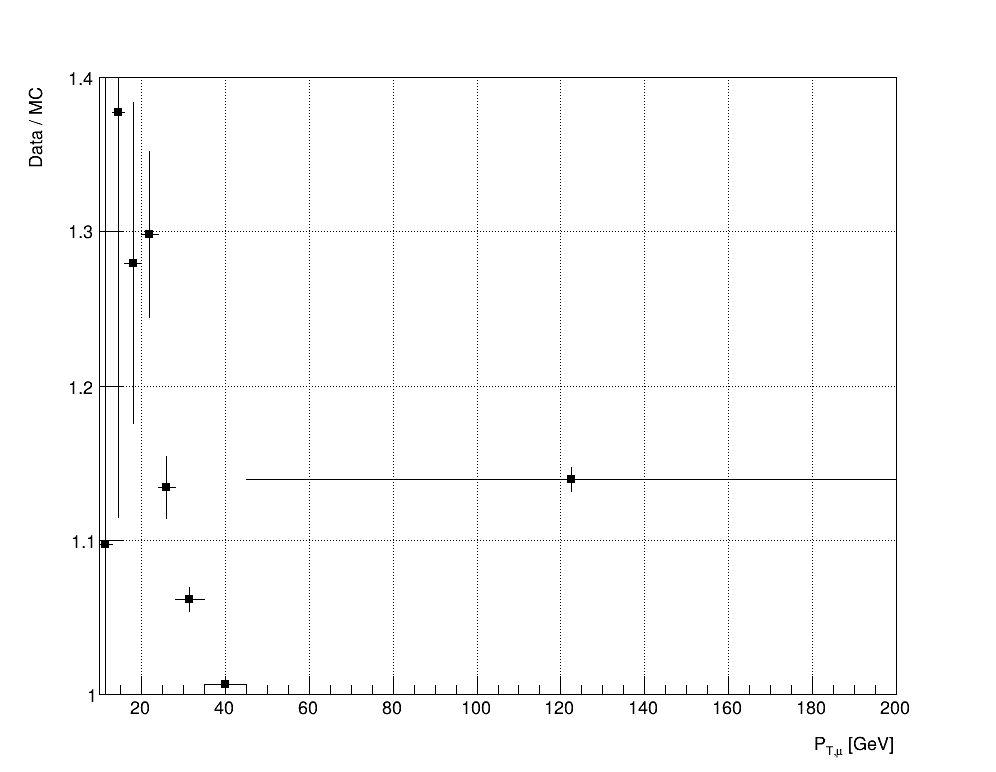

In [15]:
c1 = ROOT.TCanvas("","",1000,800)
c1.Draw()


h3.Draw('ep')
h3.SetXTitle('P_{T,#mu} [GeV]')
h3.GetXaxis().SetTitleOffset(1.6)
h3.GetXaxis().SetRangeUser(10,60)
h3.SetMaximum(1.4)
h3.SetMinimum(1.0)
ROOT.gPad.SetGridy()
ROOT.gPad.SetGridx()

print(h3.GetBinContent(7))
print(h3.GetBinError(7))
print(h3.GetBinContent(8))
print(h3.GetBinError(8))

### <span id="Fake-Rate">Calculating Fake Rate</span>

#### Muon

In [56]:
def AddHist_FR_Mu(file, h_nume_mu, h_deno_mu, isAdd, isData, lumi_Mu8, lumi_Mu17, xsec):
    
    if isData:
        print('is Data')
        branches = uproot.open(file+':Events').arrays(['jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt'], library='pd')
    else:
        print('is MC')
        branches = uproot.open(file+':Events').arrays(['jet_pt','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_pfRelIso04_all','lepton_gen_matching','HLT_IsoMu24','HLT_Mu8_TrkIsoVVL','HLT_Mu17_TrkIsoVVL','hlt','gen_weight'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        weight_lowpt = (1000*lumi_Mu8*xsec*isAdd) / true_events
        weight_highpt = (1000*lumi_Mu17*xsec*isAdd) / true_events
        lepton_gen_cut1 = branches.loc[:,'lepton_gen_matching'] == 1
        lepton_gen_cut2 = branches.loc[:,'lepton_gen_matching'] == 15
        
    HLT_cut1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL'] == True
    HLT_cut2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL'] == True
#     HLT_cut1 = branches.loc[:,'HLT_IsoMu24'] == True
    met_cut = branches.loc[:,'met'] < 20
    mt_cut = branches.loc[:,'mt'] < 20
    muon_cut = abs(branches.loc[:,'lepton_pdgid']) == 13
    pf_cut = branches.loc[:,'lepton_pfRelIso04_all'] < 0.15
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    jet_pt = branches.loc[:,'jet_pt'] >35

#     deno_mu = branches.loc[(HLT_cut1 | HLT_cut2) & muon_cut,:]
#     deno_mu = branches.loc[(HLT_cut1) & muon_cut,:]
        
#     deno_mu = branches.loc[((HLT_cut1 & pt_edge) | (HLT_cut2 & ~pt_edge)) & muon_cut,:]
#     nume_mu_lowpt = deno_mu.loc[pf_cut,:]
#     nume_mu_highpt = deno_mu.loc[pf_cut,:]
    
    overflow_Y = h_deno_mu.GetYaxis().GetBinUpEdge(h_deno_mu.GetNbinsY())
    center_upper_Y = h_deno_mu.GetYaxis().GetBinCenter(h_deno_mu.GetNbinsY())
    
    if isData:
        deno_mu_lowpt = branches.loc[HLT_cut1 & pt_edge & muon_cut & met_cut & mt_cut & jet_pt,:]
        deno_mu_highpt = branches.loc[HLT_cut2 & ~pt_edge & muon_cut & met_cut & mt_cut & jet_pt,:]
        
        
        for i in trange(0, len(deno_mu_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_mu_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]))
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y)
                
        for i in trange(0, len(deno_mu_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_mu_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]))
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y)
                    
                
    else:
        deno_mu_lowpt = branches.loc[HLT_cut1 & pt_edge & muon_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
        deno_mu_highpt = branches.loc[HLT_cut2 & ~pt_edge & muon_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
        
        # Add SF
        deno_mu_highpt.loc[:,'SF'] = 1
        deno_mu_highpt.loc[(deno_mu_highpt['lepton_pt'] >= 35) & (deno_mu_highpt['lepton_pt'] < 45), 'SF'] = 1
        deno_mu_highpt.loc[deno_mu_highpt['lepton_pt'] >= 45 , 'SF'] = 1
        
#         print(deno_mu_highpt)
        
        for i in trange(0, len(deno_mu_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_mu_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), float(deno_mu_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
                if deno_mu_lowpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_mu_lowpt['gen_weight'].values[i]))
                
        for i in trange(0, len(deno_mu_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_mu_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]), deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), float(deno_mu_highpt['lepton_pt'].values[i]), deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))
            else:
                h_deno_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y, deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))
                if deno_mu_highpt['lepton_pfRelIso04_all'].values[i] < 0.15:
                    h_nume_mu.Fill(abs(float(deno_mu_highpt['lepton_eta'].values[i])), center_upper_Y, deno_mu_highpt['SF'].values[i]*weight_highpt*sgn(deno_mu_highpt['gen_weight'].values[i]))


    deno_counts = 0
    for i in range(h_deno_mu.GetNbinsX()):
        for j in range(h_deno_mu.GetNbinsY()):
            deno_counts += h_deno_mu.GetBinContent(i+1,j+1) 

    nume_counts = 0
    for i in range(h_nume_mu.GetNbinsX()):
        for j in range(h_nume_mu.GetNbinsY()):
            nume_counts += h_nume_mu.GetBinContent(i+1,j+1) 

    print (f"normalized deno :{deno_counts}")
    print (f"normalized nume :{nume_counts}")
        

In [57]:
# xbins = 5
# xlow = 0
# xup = 2.5

# ybins = 3
# ylow = 25
# yup = 50

ybins = [10, 13, 16, 20, 24, 28, 35, 45, 60]
xbins = [.0, 0.5, 1.0, 1.5, 2.0, 2.5]

from array import array
h_deno_mu = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_mu.StatOverflows(1)
h_deno_mu.Sumw2()
h_nume_mu = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_mu.StatOverflows(1)
h_nume_mu.Sumw2()

# file_DATA = "/eos/user/s/sdeng/ttx/fake_lepton_template/SingleMuon_Run2017B.root"
# file_DATA = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D.root"
# AddDATA(file_DATA, h_nume_mu, h_deno_mu)

file_list_Mu = [
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017C_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017D_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017E_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017F_0000.root',
]
for file_DATA in file_list_Mu:
    AddHist_FR_Mu(file_DATA, h_nume_mu, h_deno_mu, 1, 1, 0, 0, 0)

# file_MC = "/eos/user/s/sdeng/ttx/fake_lepton_template/WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8_2017.root"
file_WJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
file_ZJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
file_ZJets2 = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
xsec_WJets = 61526.7 
xsec_ZJets = 6077.22 
xsec_ZJets2 = 18610

# lumi = 14.003 # 2018A
# lumi = 7.055 # 2018B
# lumi = 6.890 # 2018C
# lumi = 31.835 # 2018D

lumi_Mu8 = 0.00290 # HLT_Mu8_TrkIsoVVL 2017 lumi
lumi_Mu17 = 0.06594 # HLT_Mu17_TrkIsoVVL 2017 lumi


AddHist_FR_Mu(file_WJets, h_nume_mu, h_deno_mu, -1, 0, lumi_Mu8, lumi_Mu17, xsec_WJets)
AddHist_FR_Mu(file_ZJets, h_nume_mu, h_deno_mu, -1, 0, lumi_Mu8, lumi_Mu17, xsec_ZJets)
AddHist_FR_Mu(file_ZJets2, h_nume_mu, h_deno_mu, -1, 0, lumi_Mu8, lumi_Mu17, xsec_ZJets2)
print (lumi_Mu8, lumi_Mu17, xsec_WJets)
print (lumi_Mu8, lumi_Mu17, xsec_ZJets)
print (lumi_Mu8, lumi_Mu17, xsec_ZJets2)

is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017C_0000.root: 100%|██████████| 7075/7075 [00:00<00:00, 44430.26it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017C_0000.root: 100%|██████████| 8968/8968 [00:00<00:00, 46550.89it/s]


normalized deno :15999.0
normalized nume :5719.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017D_0000.root: 100%|██████████| 3264/3264 [00:00<00:00, 45760.63it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017D_0000.root: 100%|██████████| 5718/5718 [00:00<00:00, 46299.64it/s]


normalized deno :24967.0
normalized nume :9039.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017E_0000.root: 100%|██████████| 4878/4878 [00:00<00:00, 45828.30it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017E_0000.root: 100%|██████████| 8229/8229 [00:00<00:00, 46259.40it/s]


normalized deno :38054.0
normalized nume :14097.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017F_0000.root: 100%|██████████| 6211/6211 [00:00<00:00, 45030.04it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DoubleMuon_Run2017F_0000.root: 100%|██████████| 9761/9761 [00:00<00:00, 45789.02it/s]


normalized deno :54003.0
normalized nume :20151.0
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 16416/16416 [00:00<00:00, 29157.07it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 40562/40562 [00:02<00:00, 19547.94it/s]


normalized deno :51704.63180097781
normalized nume :17958.9832301538
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 97322/97322 [00:03<00:00, 28254.22it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 115766/115766 [00:06<00:00, 18903.55it/s]


normalized deno :51227.299849201234
normalized nume :17506.552182179887
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 16298/16298 [00:00<00:00, 29720.18it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 6878/6878 [00:00<00:00, 19405.16it/s]


normalized deno :51086.12692082201
normalized nume :17376.153779343727
0.0029 0.06594 61526.7
0.0029 0.06594 6077.22
0.0029 0.06594 18610


41.5 fb^{-1} (13 TeV)


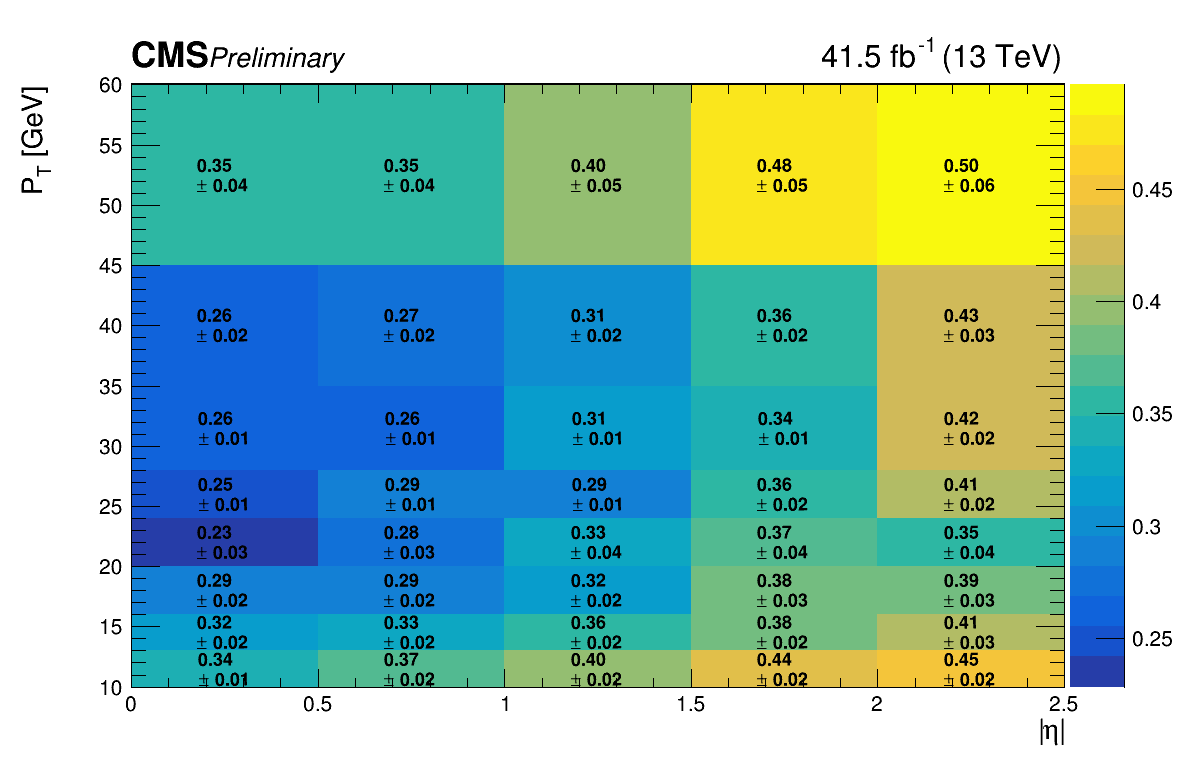

In [58]:
fake_rate_mu = h_nume_mu.Clone("fake_rate_mu")
fake_rate_mu.Divide(h_deno_mu)

fake_rate_mu.SetDirectory(0)
c1 = ROOT.TCanvas("","",1200,800)
fake_rate_mu.SetStats(0)
fake_rate_mu.SetXTitle("|#eta|")
fake_rate_mu.SetYTitle("P_{T} [GeV]")
fake_rate_mu.SetMarkerSize(1.3)
ROOT.gStyle.SetPaintTextFormat('4.2f')
fake_rate_mu.Draw("TEXT COLZe")
c1.Draw()
CMS_lumi(c1,0,0)
# c1.SaveAs('Fake_Lepton/2017/FR_Muon_data_2017_new.pdf')
# c1.SaveAs('Fake_Lepton/2017/FR_Muon_data_2017_new.png')

In [60]:
f = ROOT.TFile("Fake_Lepton/Mu_Fake_Rate_2D_2017.root","RECREATE")
f.cd()
fake_rate_mu.Write()
f.Close()

#### Electron 

In [61]:
def AddHist_FR_Ele(file, h_nume_e, h_deno_e, isAdd, isData, lumi_Ele8, lumi_Ele23, xsec):
    
    if isData:
        print('is Data')
        branches = uproot.open(file+':Events').arrays(['jet_pt','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt'], library='pd')
    else:
        print('is MC')
        branches = uproot.open(file+':Events').arrays(['jet_pt','is_lepton_tight','mt','met','lepton_pt','lepton_eta','lepton_pdgid','lepton_gen_matching','HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30','HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30','hlt','gen_weight'], library='pd')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        weight_lowpt = (1000*lumi_Ele8*xsec*isAdd) / true_events
        weight_highpt = (1000*lumi_Ele23*xsec*isAdd) / true_events
        lepton_gen_cut1 = branches.loc[:,'lepton_gen_matching'] == 1
        lepton_gen_cut2 = branches.loc[:,'lepton_gen_matching'] == 15
        
    HLT_cut1 = branches.loc[:,'HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    HLT_cut2 = branches.loc[:,'HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30'] == True
    met_cut = branches.loc[:,'met'] < 20
    mt_cut = branches.loc[:,'mt'] < 20
    Electron_cut = abs(branches.loc[:,'lepton_pdgid']) == 11
    pt_edge = branches.loc[:,'lepton_pt'] < 25
    jet_pt = branches.loc[:,'jet_pt'] >35

#     deno_e = branches.loc[(HLT_cut1 | HLT_cut2) & muon_cut,:]
#     deno_e = branches.loc[(HLT_cut1) & muon_cut,:]
        
#     deno_e = branches.loc[((HLT_cut1 & pt_edge) | (HLT_cut2 & ~pt_edge)) & muon_cut,:]
#     nume_e_lowpt = deno_e.loc[pf_cut,:]
#     nume_e_highpt = deno_e.loc[pf_cut,:]
    
    overflow_Y = h_deno_e.GetYaxis().GetBinUpEdge(h_deno_e.GetNbinsY())
    center_upper_Y = h_deno_e.GetYaxis().GetBinCenter(h_deno_e.GetNbinsY())
    
    if isData:
        deno_e_lowpt = branches.loc[HLT_cut1 & pt_edge & Electron_cut & met_cut & mt_cut & jet_pt,:]
        deno_e_highpt = branches.loc[HLT_cut2 & ~pt_edge & Electron_cut & met_cut & mt_cut & jet_pt,:]
        
        
        for i in trange(0, len(deno_e_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_e_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]))
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y)
                
        for i in trange(0, len(deno_e_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_e_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]))
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y)
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y)
                    
                
    else:
        deno_e_lowpt = branches.loc[HLT_cut1 & pt_edge & Electron_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
        deno_e_highpt = branches.loc[HLT_cut2 & ~pt_edge & Electron_cut & met_cut & mt_cut & (lepton_gen_cut1 | lepton_gen_cut2) & jet_pt,:].copy()
        
        # Add SF
        deno_e_highpt.loc[:,'SF'] = 1
        deno_e_highpt.loc[(deno_e_highpt['lepton_pt'] >= 35) & (deno_e_highpt['lepton_pt'] < 45), 'SF'] = 1
        deno_e_highpt.loc[deno_e_highpt['lepton_pt'] >= 45 , 'SF'] = 1
        
#         print(deno_e_highpt)
        
        for i in trange(0, len(deno_e_lowpt['lepton_pt']), desc=f'fill pt < 25 GeV for {file}'):
            if float(deno_e_lowpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), float(deno_e_lowpt['lepton_pt'].values[i]), weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
                if deno_e_lowpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_lowpt['lepton_eta'].values[i])), center_upper_Y, weight_lowpt*sgn(deno_e_lowpt['gen_weight'].values[i]))
                
        for i in trange(0, len(deno_e_highpt['lepton_pt']), desc=f'fill pt > 25 GeV for {file}'):
            if float(deno_e_highpt['lepton_pt'].values[i]) < overflow_Y:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]), deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), float(deno_e_highpt['lepton_pt'].values[i]), deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))
            else:
                h_deno_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y, deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))
                if deno_e_highpt['is_lepton_tight'].values[i] == 1:
                    h_nume_e.Fill(abs(float(deno_e_highpt['lepton_eta'].values[i])), center_upper_Y, deno_e_highpt['SF'].values[i]*weight_highpt*sgn(deno_e_highpt['gen_weight'].values[i]))


    deno_counts = 0
    for i in range(h_deno_e.GetNbinsX()):
        for j in range(h_deno_e.GetNbinsY()):
            deno_counts += h_deno_e.GetBinContent(i+1,j+1) 

    nume_counts = 0
    for i in range(h_nume_e.GetNbinsX()):
        for j in range(h_nume_e.GetNbinsY()):
            nume_counts += h_nume_e.GetBinContent(i+1,j+1) 

    print (f"normalized deno :{deno_counts}")
    print (f"normalized nume :{nume_counts}")
        

In [62]:
# xbins = 5
# xlow = 0
# xup = 2.5

# ybins = 3
# ylow = 25
# yup = 50

ybins = [10, 13, 16, 20, 24, 28, 35, 45, 60]
xbins = [.0, 0.5, 1.0, 1.5, 2.0, 2.5]

from array import array
h_deno_e = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_e.StatOverflows(1)
h_deno_e.Sumw2()
h_nume_e = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_e.StatOverflows(1)
h_nume_e.Sumw2()

# file_DATA = "/eos/user/s/sdeng/ttx/fake_lepton_template/SingleMuon_Run2017B.root"
# file_DATA = "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/SingleMuon_Run2018D.root"
# AddDATA(file_DATA, h_nume_e, h_deno_e)

file_list_E = [
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017C_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017D_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017E_0000.root',
    '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017F_0000.root',
]
for file_DATA in file_list_E:
    AddHist_FR_Ele(file_DATA, h_nume_e, h_deno_e, 1, 1, 0, 0, 0)



is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017C_0000.root: 100%|██████████| 7373/7373 [00:00<00:00, 34623.31it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017C_0000.root: 100%|██████████| 8797/8797 [00:00<00:00, 47412.84it/s]


normalized deno :16150.0
normalized nume :6065.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017D_0000.root: 100%|██████████| 1765/1765 [00:00<00:00, 44162.68it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017D_0000.root: 100%|██████████| 4562/4562 [00:00<00:00, 45497.36it/s]


normalized deno :22466.0
normalized nume :8546.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017E_0000.root: 100%|██████████| 2426/2426 [00:00<00:00, 45674.78it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017E_0000.root: 100%|██████████| 5922/5922 [00:00<00:00, 46703.89it/s]


normalized deno :30800.0
normalized nume :11906.0
is Data


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017F_0000.root: 100%|██████████| 6155/6155 [00:00<00:00, 45196.61it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/SingleElectron_Run2017F_0000.root: 100%|██████████| 13968/13968 [00:00<00:00, 46804.13it/s]


normalized deno :50895.0
normalized nume :19674.0


In [63]:
# file_MC = "/eos/user/s/sdeng/ttx/fake_lepton_template/WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8_2017.root"
file_WJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
file_ZJets = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
file_ZJets2 = '/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root'
xsec_WJets = 61526.7 
xsec_ZJets = 6077.22 
xsec_ZJets2 = 18610


lumi_Ele8 = 0.00397 # HLT_Ele8_CaloIdL_TrackIdL_IsoVL_PFJet30 2018 lumi
lumi_Ele23 = 0.04347 # HLT_Ele23_CaloIdL_TrackIdL_IsoVL_PFJet30 2018 lumi


AddHist_FR_Ele(file_WJets, h_nume_e, h_deno_e, -1, 0, lumi_Ele8, lumi_Ele23, xsec_WJets)
AddHist_FR_Ele(file_ZJets, h_nume_e, h_deno_e, -1, 0, lumi_Ele8, lumi_Ele23, xsec_ZJets)
AddHist_FR_Ele(file_ZJets2, h_nume_e, h_deno_e, -1, 0, lumi_Ele8, lumi_Ele23, xsec_ZJets2)
print (lumi_Ele8, lumi_Ele23, xsec_WJets)
print (lumi_Ele8, lumi_Ele23, xsec_ZJets)
print (lumi_Ele8, lumi_Ele23, xsec_ZJets2)

is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 8434/8434 [00:00<00:00, 26786.44it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 28413/28413 [00:01<00:00, 19207.48it/s]


normalized deno :49824.38424540343
normalized nume :18635.95324419596
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 82468/82468 [00:02<00:00, 28617.30it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 271012/271012 [00:14<00:00, 19017.64it/s]


normalized deno :49094.78041820336
normalized nume :17932.19793209704
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 9471/9471 [00:00<00:00, 28150.31it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/2017/DYJetsToLL_M-10to50_TuneCP5_13TeV-madgraphMLM-pythia8_2017_0000.root: 100%|██████████| 5311/5311 [00:00<00:00, 19058.15it/s]


normalized deno :49019.18979074598
normalized nume :17860.472997738467
0.00397 0.04347 61526.7
0.00397 0.04347 6077.22
0.00397 0.04347 18610


41.5 fb^{-1} (13 TeV)


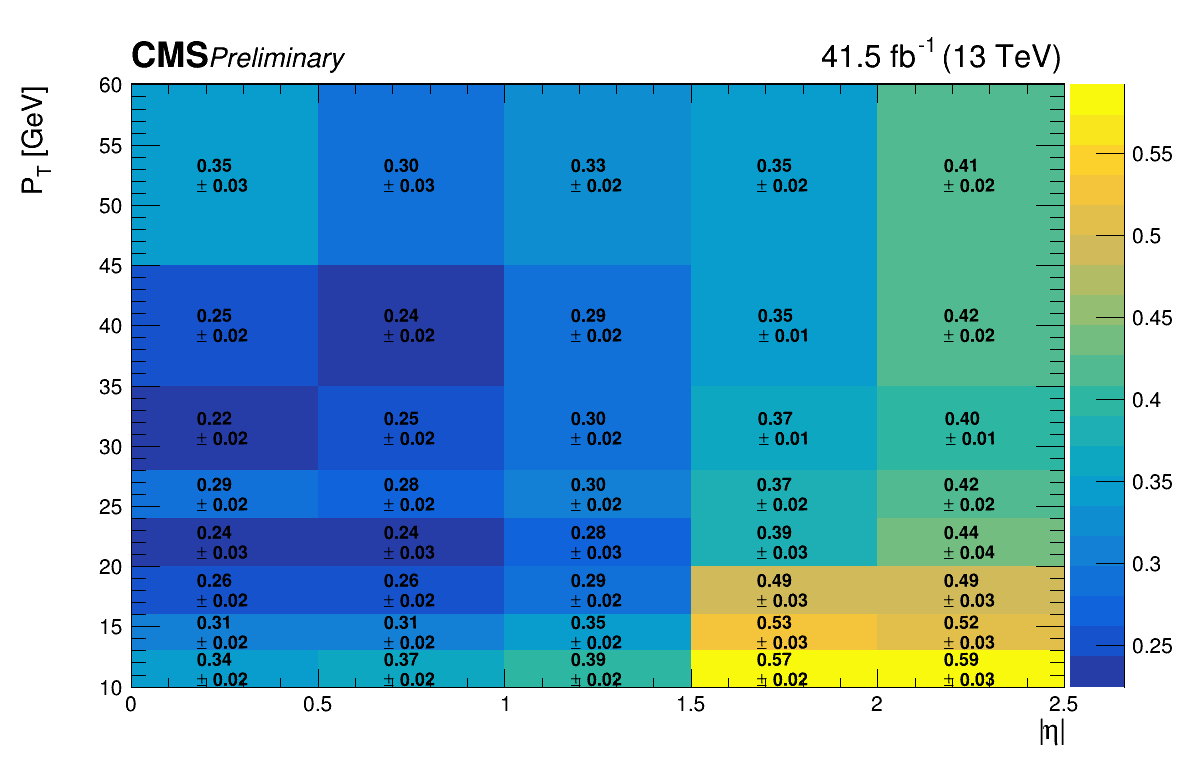

In [64]:
fake_rate_e = h_nume_e.Clone("fake_rate_e")
fake_rate_e.Divide(h_deno_e)

fake_rate_e.SetDirectory(0)
c1 = ROOT.TCanvas("","",1200,800)
fake_rate_e.SetStats(0)
fake_rate_e.SetXTitle("|#eta|")
fake_rate_e.SetYTitle("P_{T} [GeV]")
fake_rate_e.SetMarkerSize(1.3)
ROOT.gStyle.SetPaintTextFormat('4.2f')
fake_rate_e.Draw("COLZe TEXT")
c1.Draw()
CMS_lumi(c1,0,0)
# c1.SaveAs('Fake_Lepton/2017/FR_Electron_data_2017_new.pdf')
# c1.SaveAs('Fake_Lepton/2017/FR_Electron_data_2017_new.png')

In [65]:
f = ROOT.TFile("Fake_Lepton/Ele_Fake_Rate_2D_2017.root","RECREATE")
f.cd()
fake_rate_e.Write()
f.Close()

#### test

In [69]:
h_deno_mu_1075 = h_deno_mu.Clone()
h_nume_mu_1075 = h_nume_mu.Clone()

In [74]:
h_deno_mu_diff = h_deno_mu.Clone()
h_nume_mu_diff = h_nume_mu.Clone()

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


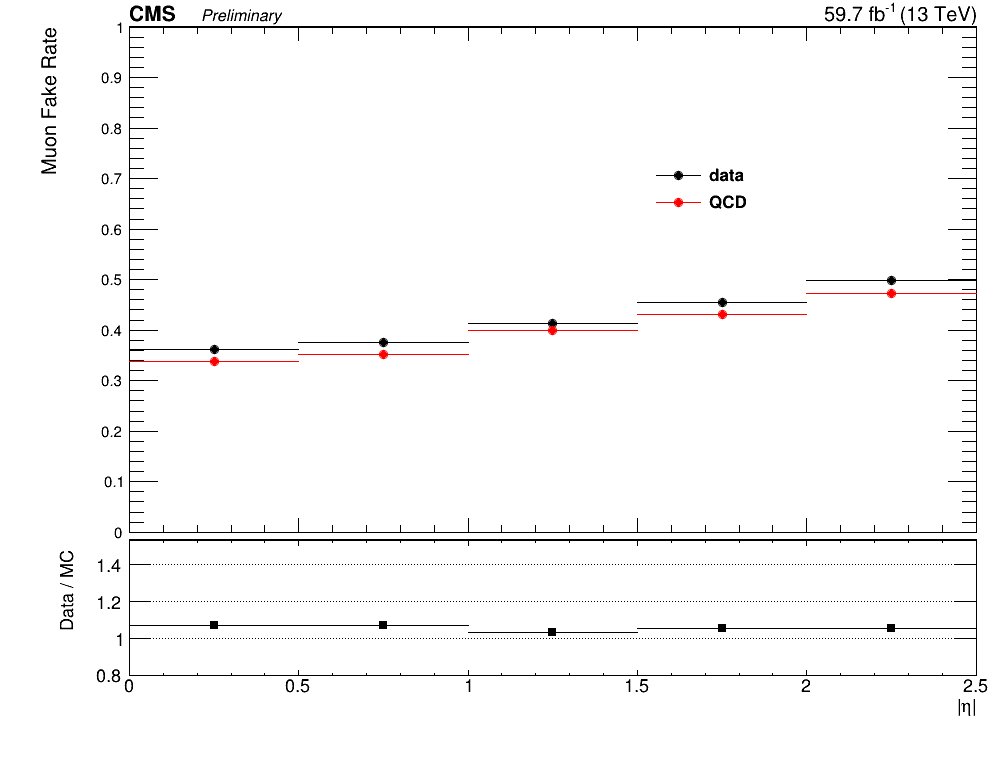

In [82]:
TH1D_data_deno = h_deno_mu_1075.ProjectionX("TH1D_data_deno",1,8)
TH1D_data = h_nume_mu_1075.ProjectionX("TH1D_data",1,8)
TH1D_data.Divide(TH1D_data_deno)

TH1D_QCD_deno = h_deno_mu_valid.ProjectionX("TH1D_QCD_deno",1,8)
TH1D_QCD = h_nume_mu_valid.ProjectionX("TH1D_QCD",1,8)
TH1D_QCD.Divide(TH1D_QCD_deno)

c1 = ROOT.TCanvas("c1","",1000,800)
TH1D_data.SetStats(0)
TH1D_data.SetMarkerStyle(20)
TH1D_data.SetMarkerColor(1)
TH1D_data.SetLineColor(1)
TH1D_data.GetXaxis().SetTitle("|#eta|")
TH1D_data.GetYaxis().SetTitle("Muon Fake Rate")

TH1D_QCD.SetStats(0)
TH1D_QCD.SetMarkerStyle(20)
TH1D_QCD.SetMarkerColor(2)
TH1D_QCD.SetLineColor(2)

h1 = TH1D_data.Clone("h1")
h2 = TH1D_QCD.Clone("h2")
h3 = createRatio(h1, h2)

c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

h1.SetMaximum(1)
h1.SetMinimum(0)
# CMS_lumi(c1, 0, 0)


# Upper histogram plot is pad1
legend = ROOT.TLegend(0.65, 0.60, 0.90, 0.7)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
legend.AddEntry(h1,'data')
legend.AddEntry(h2,'QCD')

# draw everything
pad1.cd()
h1.Draw("ep")
h2.Draw("ep same")
legend.Draw("same")
# to avoid clipping the bottom zero, redraw a small axis
h1.GetXaxis().SetLabelSize(0)
# axis = TGaxis(-5, 20, -5, 220, 20, 220, 510, "")
# axis.SetLabelFont(43)
# axis.SetLabelSize(15)
# axis.Draw()
pad2.cd()
h3.Draw("ep")

CMS_lumi(pad1, 0, 0)

# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.pdf')
# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.png')

### <span id="Apply-Weight">Apply weight</span>

Has been abandoned, moved to NanoAOD-tools to interface with coffea framework

### <span id="Closure-Test">Closure test</span>

Noticed that the ApplyWeightMC and AddHist_FR modules need to be changed before running this part

In [57]:
ybins = [10, 13, 16, 20, 24, 28, 35, 45, 60]
xbins = [.0, 0.5, 1.0, 1.5, 2.0, 2.5]

from array import array
h_deno_mu_valid = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_deno_mu_valid.Sumw2()
h_nume_mu_valid = ROOT.TH2D("","", 5, array('d',xbins), 8, array('d',ybins))
h_nume_mu_valid.Sumw2()

file_list_QCD = [
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root"
]

xsec_list_QCD = [
    2799000,
    2526000,
    1362000,
    376600,
    88930,
    21230,
    7055,
    619.3,
    59.24,
    18.21,
    3.275,
    1.078
]

lumi_Mu8 = 0.00856 # HLT_Mu8_TrkIsoVVL 2018 lumi
lumi_Mu17 = 0.04578 # HLT_Mu17_TrkIsoVVL 2018 lumi

for i in range(0,len(file_list_QCD)):
    print ("test",i)
    AddHist_FR_Mu(file_list_QCD[i], h_nume_mu_valid, h_deno_mu_valid, 1, 0, lumi_Mu8, lumi_Mu17, xsec_list_QCD[i])
#     AddMC(file_list_QCD[i], h_nume_mu_valid, h_deno_mu_valid, 59.783, xseclist_QCD[i], 1)


test 0
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:  24%|██▎       | 3281/13815 [00:00<00:00, 32802.76it/s]

              mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
966    19.336433   3.644366  28.324068    1.033936         -13.0   
8731   17.976048  18.295549  27.653450   -0.332397          13.0   
13683  17.004454  15.365691  31.637777   -0.674805          13.0   
14666   3.605408  12.286318  27.077047   -0.724731          13.0   
16187   1.700580  16.920927  27.161320    2.051270         -13.0   
35611   7.419856  16.871332  29.125633   -0.958130          13.0   
39025   4.080609   9.245059  29.251818   -0.672241          13.0   
40243  10.178957  18.737768  25.579098   -2.398438          13.0   
42086   6.020486  10.754062  25.753265    0.363770         -13.0   
43264   9.248097   7.324045  25.270433   -1.443604         -13.0   
54767   3.160503  16.050798  30.823074    1.232178         -13.0   
57500   7.131109  19.675585  31.043694   -0.881104          13.0   
57774  15.071644   6.106773  29.884708    0.721680          13.0   
65799   2.373636   2.787545  25.809834   -0.2131

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 13815/13815 [00:00<00:00, 33553.77it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 14/14 [00:00<00:00, 4773.23it/s]


normalized deno :84575.45726519308
normalized nume :37120.94087939867
test 1
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:   2%|▏         | 3676/183282 [00:00<00:04, 36746.72it/s]

               mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
510      8.028522  10.425488  28.956394   -1.920166          13.0   
4504     7.641076   4.077742  30.225208   -1.001221         -13.0   
5139     3.079750   6.435861  30.245390    1.332275          13.0   
6148    12.039488  10.943210  26.565254    0.155792         -13.0   
6493    19.238157  12.159963  27.714695    1.333252         -13.0   
...           ...        ...        ...         ...           ...   
940733   2.321144   2.279202  27.330278   -1.181152          13.0   
941307   3.298965   8.078152  26.387110    0.787842          13.0   
941761   5.589353  16.432974  26.522255   -0.395447          13.0   
944397  14.908171   5.796571  25.425804   -1.840576          13.0   
944510   9.384368  17.634085  25.826826   -0.485352          13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
510                  0.084923                  5.0        False   
4504                 0.163658        

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 183282/183282 [00:05<00:00, 32201.20it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 1181/1181 [00:00<00:00, 26715.60it/s]


normalized deno :229249.62142241074
normalized nume :95022.87600316353
test 2
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:   2%|▏         | 3733/209888 [00:00<00:05, 37323.90it/s]

                mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
35       10.057162   4.575057  30.663021   -1.382812         -13.0   
122       4.662006   9.386549  28.093203   -1.921631          13.0   
282       6.768826  15.951384  27.730459   -1.647461          13.0   
352       2.020753   8.417920  30.606695   -2.212402         -13.0   
558      17.634539   4.059681  25.549597    0.326416          13.0   
...            ...        ...        ...         ...           ...   
1348341  17.086969  15.841807  25.514963    1.661133         -13.0   
1348342   5.686658   8.694186  25.058256   -1.756592          13.0   
1348343  11.810036  13.346023  26.036991    0.024574         -13.0   
1348454  19.209290  18.842955  26.539146   -1.419922          13.0   
1348558  14.119909   3.147878  29.936331    1.750977          13.0   

         lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
35                    0.391081                  4.0        False   
122                   0

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 209888/209888 [00:06<00:00, 34427.51it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 11650/11650 [00:00<00:00, 26306.35it/s]


normalized deno :331842.4735408668
normalized nume :132395.81988999862
test 3
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:  10%|▉         | 7251/75666 [00:00<00:01, 36119.30it/s]

               mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
49      17.123222  13.182776  37.635071   -0.484741          13.0   
120      2.346130  18.580990  38.373352   -0.879150          13.0   
129      1.041009   7.898039  33.547108   -1.083496         -13.0   
136     13.983636  16.730976  27.773895   -2.322266         -13.0   
156     17.697035   4.912769  28.219532    1.218750         -13.0   
...           ...        ...        ...         ...           ...   
780151  17.130304  17.352217  28.283176    1.959717         -13.0   
780366  19.261063  19.177225  38.019745   -2.034668          13.0   
780379   3.576951  19.801666  25.554428   -1.239502         -13.0   
780381   9.927012  12.870188  28.567055    1.727783          13.0   
780423  18.196516  13.220934  25.455997   -1.242920         -13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
49                   0.397715                  5.0        False   
120                  0.320888        

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 75666/75666 [00:02<00:00, 35972.58it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 20127/20127 [00:00<00:00, 27367.89it/s]


normalized deno :361260.7178967153
normalized nume :141931.89727657527
test 4
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:   8%|▊         | 3753/47192 [00:00<00:01, 37523.06it/s]

               mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
43      17.446800   8.736309  48.729412   -0.259155         -13.0   
77       4.014639  15.803831  45.451759    0.472961         -13.0   
83       0.918543   8.872256  61.558582   -1.649414         -13.0   
107      5.321715  11.407681  37.522854    1.313721         -13.0   
121     12.377909  18.946749  70.443619   -1.416260         -13.0   
...           ...        ...        ...         ...           ...   
760551  10.946353   4.245192  29.634020   -0.152496         -13.0   
760616   8.704479  19.916227  29.497543   -1.281494         -13.0   
760710   7.174362  16.702925  41.546700    2.214844          13.0   
760718  17.209988  11.006146  28.679317   -2.085449         -13.0   
760723   9.809812   3.886118  39.140636   -0.590332          13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
43                   0.213340                  5.0        False   
77                   0.310533        

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 47192/47192 [00:01<00:00, 35070.81it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 21611/21611 [00:00<00:00, 27619.20it/s]


normalized deno :366124.87909418176
normalized nume :143414.6884026562
test 5
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:  13%|█▎        | 2949/23033 [00:00<00:00, 29482.93it/s]

               mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
0        8.391382   7.515080  48.142593   -1.888184          13.0   
62       7.582780   3.047485  42.626778   -1.400635         -13.0   
96      19.317354  18.875393  55.303333   -1.377930          13.0   
103     18.560783  12.652042  40.799358    0.371887          13.0   
125     11.970014  12.885004  57.262894   -1.410400         -13.0   
...           ...        ...        ...         ...           ...   
484062   4.295580   5.707514  65.196922   -1.861816          13.0   
484081   7.023051  14.546785  63.848923    0.680664          13.0   
484148   8.576848  15.272279  78.381317    1.558105         -13.0   
484182   7.412144  16.320194  52.788773   -0.936890         -13.0   
484229   5.131486  16.279261  77.568298    0.079666          13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
0                    0.304931                  5.0        False   
62                   0.296787        

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 23033/23033 [00:00<00:00, 33949.50it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 10965/10965 [00:00<00:00, 27856.82it/s]


normalized deno :366827.32942659134
normalized nume :143626.32210285706
test 6
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:  13%|█▎        | 3492/26075 [00:00<00:00, 34914.12it/s]

               mt        met   lepton_pt  lepton_eta  lepton_pdgid  \
377     15.830880   8.213878   35.787495   -1.352051          13.0   
389      4.839754  16.148504   39.113495   -0.485229         -13.0   
403      7.425726   9.020910   42.653454   -0.175354         -13.0   
501     13.366804  17.046970  174.370132    0.151489         -13.0   
638      8.772503   3.866387   74.604416   -0.606079          13.0   
...           ...        ...         ...         ...           ...   
644627  10.316574  17.103960   98.939735   -2.245605          13.0   
644720   4.311074  12.631783   27.985189    1.710938          13.0   
644823   7.296818  10.490252   27.033070   -2.363770          13.0   
644850   1.908917  15.092422   26.652246   -0.945435         -13.0   
644937   1.122880   1.879260   38.285618    0.554199          13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
377                  0.046133                  5.0         True   
389                  0.14

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 26075/26075 [00:00<00:00, 34343.48it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 10587/10587 [00:00<00:00, 29493.90it/s]


normalized deno :366963.17636015604
normalized nume :143666.74133434633
test 7
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:  16%|█▌        | 3221/19976 [00:00<00:00, 32204.73it/s]

               mt        met   lepton_pt  lepton_eta  lepton_pdgid  \
33       3.316553  15.913762  164.644943    2.068848          13.0   
49      18.198786   9.358151   49.072960   -0.981201          13.0   
115      9.454370  19.601055   27.012991   -1.117676         -13.0   
269     14.814459  13.684842   30.146973    0.562744          13.0   
364      6.978810   4.803239   96.444839   -1.268555          13.0   
...           ...        ...         ...         ...           ...   
619855   6.337331  12.604591   51.147419   -1.512451         -13.0   
619933   7.930119  13.248937   60.821804    2.006836         -13.0   
620017  10.428896  11.010891   37.498997   -1.781250          13.0   
620033   5.104097  18.665648   50.812744    0.698364          13.0   
620039  11.418807  18.591360  174.095032   -0.464905          13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
33                   0.220895                  5.0         True   
49                   0.38

fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 19976/19976 [00:00<00:00, 35349.42it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 6936/6936 [00:00<00:00, 27972.38it/s]


normalized deno :366969.3212597683
normalized nume :143668.56348757778
test 8
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 5619/5619 [00:00<00:00, 37858.45it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root:   0%|          | 0/1724 [00:00<?, ?it/s]

               mt        met   lepton_pt  lepton_eta  lepton_pdgid  \
173     16.639330  15.839948   47.626141    0.803223          13.0   
354     18.853456   4.745503  318.918793   -0.115234          13.0   
379     10.508461  18.773474   32.736950   -1.625488         -13.0   
402     12.204823  15.192431   44.804981    0.626587         -13.0   
491      0.717579  19.984295   51.075615   -0.612183         -13.0   
...           ...        ...         ...         ...           ...   
212687  17.716848  19.861486   27.742712    0.353577         -13.0   
213037  18.545216  16.619951   31.280317    1.409912          13.0   
213078   5.239328  16.392988   56.384407   -0.886108          13.0   
213346   6.678764   9.565643   40.135887    2.102051         -13.0   
213397  11.130187   9.741708   80.391792    1.544434         -13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
173                  0.399235                  5.0        False   
354                  0.15

fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-470to600_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 1724/1724 [00:00<00:00, 27268.30it/s]


normalized deno :366969.6851038631
normalized nume :143668.6782324683
test 9
is MC


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 3438/3438 [00:00<00:00, 34644.68it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-600to800_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 1067/1067 [00:00<00:00, 28965.74it/s]

               mt        met   lepton_pt  lepton_eta  lepton_pdgid  \
519      5.869051  19.419725   32.709148   -1.725098          13.0   
600     18.915604  11.240346   67.330063    1.678711          13.0   
647     19.376358  18.088690   25.596296    2.248047          13.0   
661     17.252924   8.520111   28.734381   -1.218262         -13.0   
865      5.789466   3.185699   28.254454    2.337891          13.0   
...           ...        ...         ...         ...           ...   
157280   6.188663  18.834951   25.263105    0.140106         -13.0   
157438   3.820482   4.375783   57.842190    1.825684         -13.0   
157525  15.146649   3.566643   40.398392    1.949707          13.0   
157602  17.984810  13.791980  252.027008    0.049347         -13.0   
158105  12.506927  12.880162   35.227154    2.341797         -13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
519                  0.384640                  5.0        False   
600                  0.36


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 2722/2722 [00:00<00:00, 31817.27it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-800to1000_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 825/825 [00:00<00:00, 25268.18it/s]

               mt        met   lepton_pt  lepton_eta  lepton_pdgid  \
219      5.357730  14.503051   25.942459    0.646851          13.0   
230     11.684130   5.527953  124.659309    1.714355         -13.0   
281     13.616152  16.958355   77.857239    1.165771         -13.0   
326     18.944221  18.909611  193.526611   -0.657471          13.0   
504     19.637436   9.330419   48.288811    0.343689         -13.0   
...           ...        ...         ...         ...           ...   
143398  19.705664  10.811669   37.220882    0.781250          13.0   
143419  12.251289  15.702664   28.170935    1.463623          13.0   
143472   4.240691  13.912180   31.287212   -1.878418         -13.0   
143549   0.215201  19.412579   34.623302    0.719116         -13.0   
144018  17.859884   7.435506   34.312862   -2.021973         -13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
219                  0.320787                  4.0        False   
230                  0.00


fill pt < 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 1767/1767 [00:00<00:00, 36922.09it/s]
fill pt > 25 GeV for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/QCD_Pt-1000toInf_MuEnrichedPt5_TuneCP5_13TeV_pythia8_2018.root: 100%|██████████| 467/467 [00:00<00:00, 28436.99it/s]

               mt        met  lepton_pt  lepton_eta  lepton_pdgid  \
627      2.129474   6.714786  44.748699   -0.559326         -13.0   
658      2.047309  16.531651  32.843185    1.883545         -13.0   
695     18.293377   4.195400  29.553205    0.116348         -13.0   
708     18.886402   5.568055  30.798203    1.934326         -13.0   
987     15.971433  19.574007  31.035170    0.976318          13.0   
...           ...        ...        ...         ...           ...   
110734   7.754110  11.822895  36.732555   -2.032227         -13.0   
110784  14.887724  13.508309  34.891872   -1.198975          13.0   
111112  12.426793   1.487331  76.809891    1.208496          13.0   
111215  16.501158   1.409001  68.262711    1.310791          13.0   
111235   1.546352  12.697820  33.647228   -0.473755         -13.0   

        lepton_pfRelIso04_all  lepton_gen_matching  HLT_IsoMu24  \
627                  0.165215                  4.0        False   
658                  0.150447        

59.7 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: pdf file Fake_Lepton/FR_Muon_QCD_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/FR_Muon_QCD_2018.png has been created


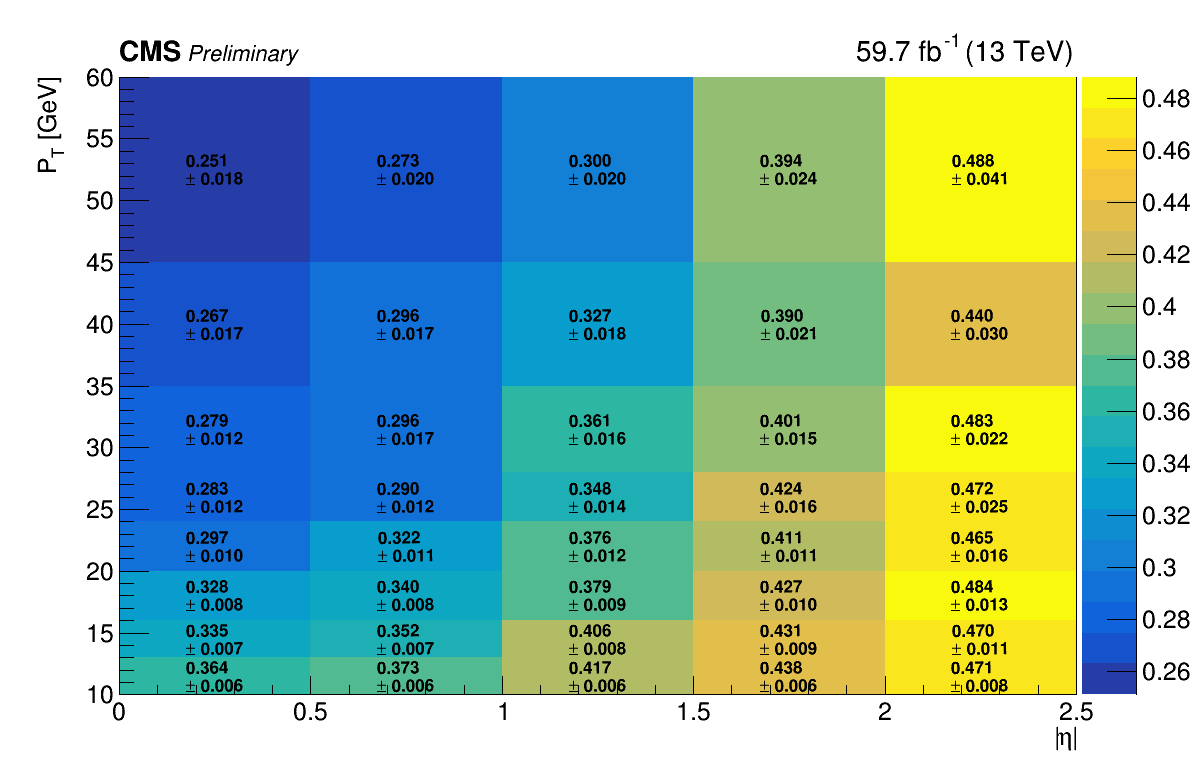

In [37]:
# default = ROOT.TStyle("Default","Default Style")
# ROOT.gROOT.SetStyle('Default')

fake_rate_mu_valid = h_nume_mu_valid.Clone("fake_rate_mu_valid")
fake_rate_mu_valid.Divide(h_deno_mu_valid)

fake_rate_mu_valid.SetDirectory(0)
c1 = ROOT.TCanvas("c1","",1200,800)
fake_rate_mu_valid.SetStats(0)
fake_rate_mu_valid.SetXTitle("|#eta|")
fake_rate_mu_valid.SetYTitle("P_{T} [GeV]")
fake_rate_mu_valid.SetMarkerSize(1.2)
fake_rate_mu_valid.Draw("TEXT COLZe")
c1.Draw()
CMS_lumi(c1, 0, 0)
# c1.SaveAs('Fake_Lepton/FR_Muon_QCD_2018.pdf')
# c1.SaveAs('Fake_Lepton/FR_Muon_QCD_2018.png')

#### FR 2D Data vs. QCD

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file Fake_Lepton/2d_FR_Muon_datavsQCD_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/2d_FR_Muon_datavsQCD_2018.png has been created


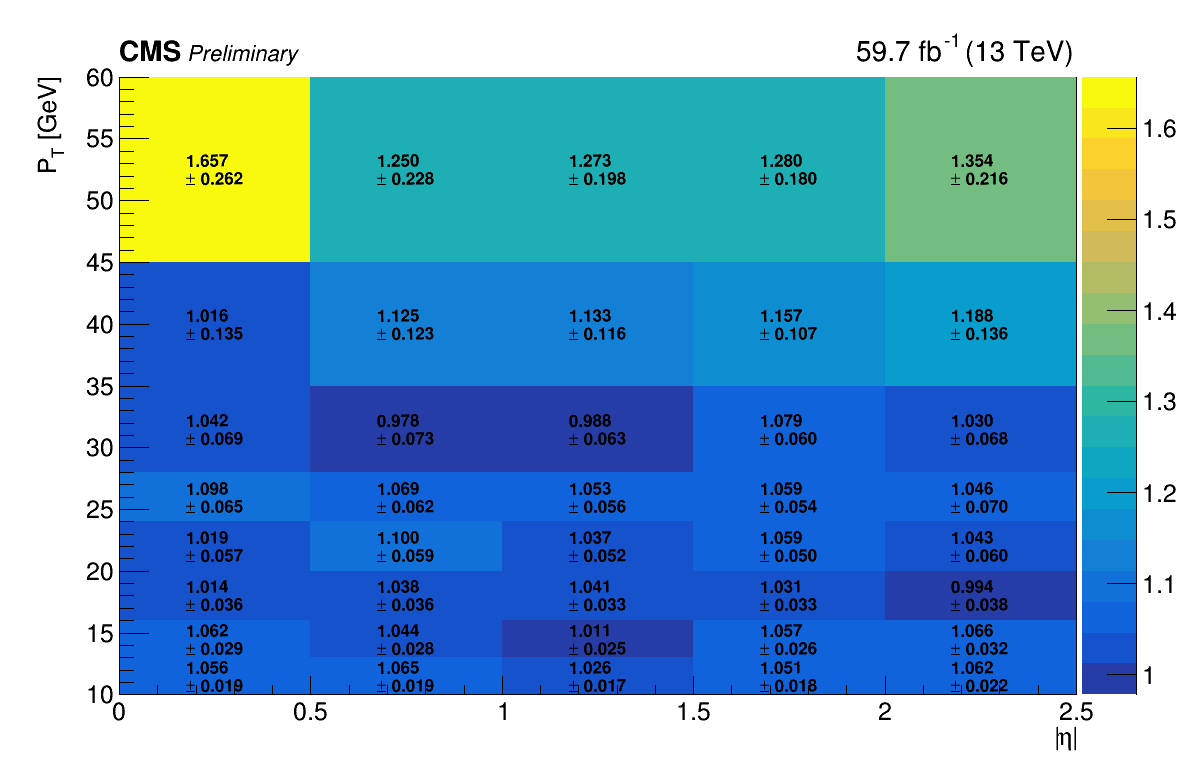

In [39]:
TH2D_ratio_mu_Data_QCD = fake_rate_mu.Clone("TH2D_ratio_mu_Data_QCD")
TH2D_ratio_mu_Data_QCD.Divide(fake_rate_mu_valid)

c1 = ROOT.TCanvas("c1","",1200,800)
TH2D_ratio_mu_Data_QCD.SetStats(0)
TH2D_ratio_mu_Data_QCD.SetXTitle("|#eta|")
TH2D_ratio_mu_Data_QCD.SetYTitle("P_{T} [GeV]")
TH2D_ratio_mu_Data_QCD.SetMarkerSize(1.2)
TH2D_ratio_mu_Data_QCD.Draw("TEXT COLZe")
c1.Draw()
CMS_lumi(c1, 0, 0)
c1.SaveAs('Fake_Lepton/2d_FR_Muon_datavsQCD_2018.pdf')
c1.SaveAs('Fake_Lepton/2d_FR_Muon_datavsQCD_2018.png')

#### FR 1D Data vs. QCD

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.pdf has been created
Info in <TCanvas::Print>: png file Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.png has been created


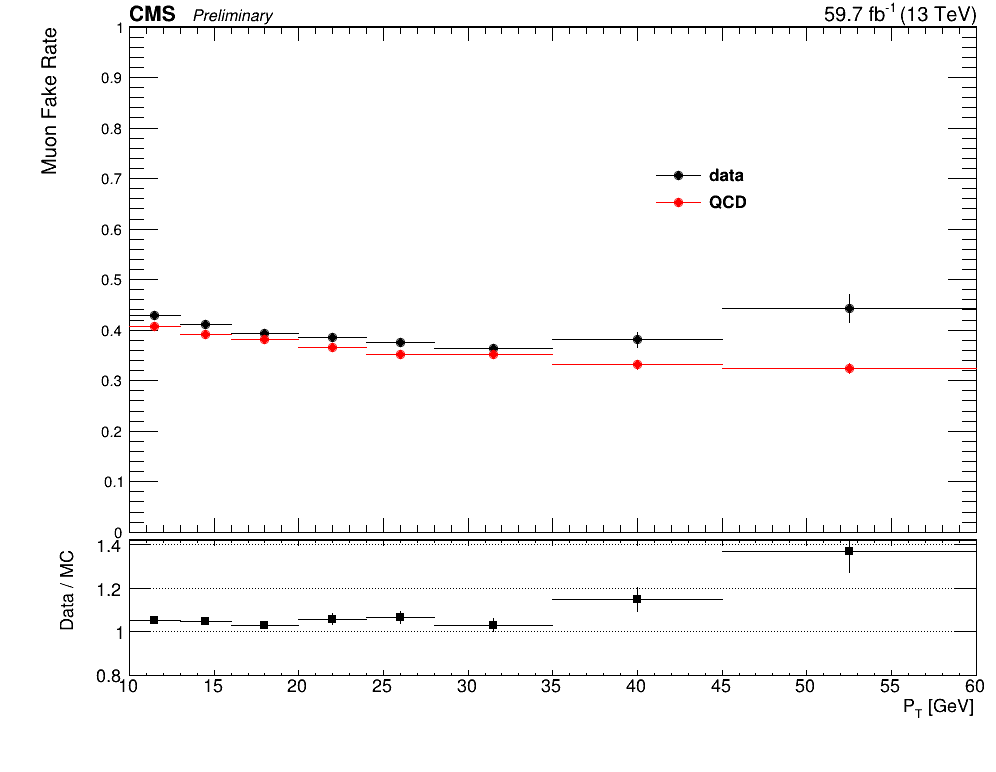

In [61]:
TH1D_data_deno = h_deno_mu.ProjectionY("TH1D_data_deno",1,5)
TH1D_data = h_nume_mu.ProjectionY("TH1D_data",1,5)
TH1D_data.Divide(TH1D_data_deno)

TH1D_QCD_deno = h_deno_mu_valid.ProjectionY("TH1D_QCD_deno",1,5)
TH1D_QCD = h_nume_mu_valid.ProjectionY("TH1D_QCD",1,5)
TH1D_QCD.Divide(TH1D_QCD_deno)

c1 = ROOT.TCanvas("c1","",1000,800)
TH1D_data.SetStats(0)
TH1D_data.SetMarkerStyle(20)
TH1D_data.SetMarkerColor(1)
TH1D_data.SetLineColor(1)
TH1D_data.GetXaxis().SetTitle("P_{T} [GeV]")
TH1D_data.GetYaxis().SetTitle("Muon Fake Rate")

TH1D_QCD.SetStats(0)
TH1D_QCD.SetMarkerStyle(20)
TH1D_QCD.SetMarkerColor(2)
TH1D_QCD.SetLineColor(2)

h1 = TH1D_data.Clone("h1")
h2 = TH1D_QCD.Clone("h2")
h3 = createRatio(h1, h2)

c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

TH1D_data.SetMaximum(1)
TH1D_data.SetMinimum(0)
# CMS_lumi(c1, 0, 0)


# Upper histogram plot is pad1
legend = ROOT.TLegend(0.65, 0.60, 0.90, 0.7)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
legend.AddEntry(h1,'data')
legend.AddEntry(h2,'QCD')

# draw everything
pad1.cd()
h1.Draw("ep")
h2.Draw("ep same")
legend.Draw("same")
# to avoid clipping the bottom zero, redraw a small axis
h1.GetXaxis().SetLabelSize(0)
# axis = TGaxis(-5, 20, -5, 220, 20, 220, 510, "")
# axis.SetLabelFont(43)
# axis.SetLabelSize(15)
# axis.Draw()
pad2.cd()
h3.Draw("ep")

CMS_lumi(pad1, 0, 0)

# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.pdf')
# c1.SaveAs('Fake_Lepton/1d_FR_Muon_datavsQCD_pt_2018.png')

### test 

In [ ]:
# ntuple = uproot.open("/eos/cms/store/group/phys_top/efe/ntuples_a02ce4df_all/MC13TeV_2017_t_sch/Chunk_0_ext0.root:analysis")
# ntuple['data']

In [ ]:
# ttc_array = ntuple['data'].arrays(['l_id','l_isPromptFinalState'],library='pd')
# ttc_array

In [ ]:
# aktest = Events.arrays(["lepton_pt","lepton_eta","lepton_pdgid"],"abs(lepton_pdgid) == 13", library='ak')

In [ ]:
# plt.style.use(hep.style.CMS)
# plt.hist(branches['lepton_pt'], bins=10, range=(0,100))
# plt.yscale('log')
# plt.xlabel('test')
# plt.show()

In [ ]:
# plt.style.use(hep.style.CMS)
# plt.hist(branches['lepton_pt'], bins=10, range=(0,100), histtype='step')
# plt.yscale('log')
# plt.show()

In [ ]:
# test_mu = uproot.open("/eos/user/s/sdeng/WZG_analysis/MC/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018/210407_110631/0000/test.root:Events").arrays(['event','Muon_pt','Muon_eta','Muon_phi'],library='pd')
# test_mu[test_mu['event'].isin([12626214])]

In [ ]:
# test_e = uproot.open("/eos/user/s/sdeng/WZG_analysis/MC/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018/210407_110631/0000/test.root:Events").arrays(['event','Electron_pt','Electron_eta','Electron_phi','Electron_mass','Electron_pdgId','Electron_cutBased','photon_pt','photon_eta','photon_phi','MET','dilepton_mass'],library='pd')
# test_e[test_e['event'].isin([12626214])]

In [ ]:
# test_a = uproot.open("/eos/user/s/sdeng/WZG_analysis/final_skim/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018.root:Events").arrays(['event','Photon_pt','Photon_eta','Photon_phi','Photon_cutBased','Photon_isScEtaEE','Photon_isScEtaEB','Photon_pixelSeed'],library='pd')
# test_a[test_a['event'].isin([12626214])]

In [ ]:
# test_mu = uproot.open("/eos/user/s/sdeng/WZG_analysis/test2/FA193293-A05C-1449-AA78-1C234BEE98FA.root:Events").arrays(['event','Muon_pt','Muon_eta','Muon_phi','Muon_tightId'],library='pd')
# test_mu[test_mu['event'].isin([3288579])]

In [ ]:
# test_e = uproot.open("/eos/user/s/sdeng/WZG_analysis/test2/FA193293-A05C-1449-AA78-1C234BEE98FA.root:Events").arrays(['event','Electron_pt','Electron_eta','Electron_deltaEtaSC','Electron_phi','Electron_pdgId','Electron_charge','Electron_cutBased','Electron_dxy','Electron_dz','MET_pt','Electron_mass'],library='pd')
# test_e[test_e['event'].isin([3288579])]

In [ ]:
# test_a = uproot.open("/eos/user/s/sdeng/WZG_analysis/test2/FA193293-A05C-1449-AA78-1C234BEE98FA.root:Events").arrays(['event','Photon_pt','Photon_eta','Photon_phi','Photon_cutBased','Photon_isScEtaEE','Photon_isScEtaEB','Photon_pixelSeed'],library='pd')
# test_a[test_a['event'].isin([3288579])]

In [ ]:
# import math
# def deltaR(eta1,eta2,phi1,phi2):
#     return math.sqrt((eta1-eta2)*(eta1-eta2)+(phi1-phi2)*(phi1-phi2))


# deltaR(1.394043,2.005371,2.279785,2.589355)

# pt1 = 35.215302
# eta1 = 0.629272
# phi1 = -2.131348
# M1 = 0.012650

# pt2 = 32.196800 
# eta2 = 1.826904 
# phi2 = 1.805176
# M2 = -0.021729 

# a=ROOT.TLorentzVector()
# a.SetPtEtaPhiM(pt1,eta1, phi1, M1)

# b=ROOT.TLorentzVector()
# b.SetPtEtaPhiM(pt2, eta2, phi2, M2)

# (a+b).M()

In [ ]:
# test_a = uproot.open("/eos/user/s/sdeng/WZG_analysis/MC/2018/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018/210407_110631/0000/tree_10.root:Events").arrays(['event','Photon_pt','Photon_eta','Photon_phi','Photon_cutBased','Photon_isScEtaEE','Photon_isScEtaEB','Photon_pixelSeed'],library='pd')
# test_a[test_a['event'].isin([6092807])]

In [ ]:
# true_events = uproot.open(file_DATA)
# true_events.keys()
# true_events['nEventsGenWeighted'].values()[0]
# true_events = uproot.open(file_DATA)['nEventsGenWeighted'].values()[0]
# true_events

2.0
1.4142135623730951


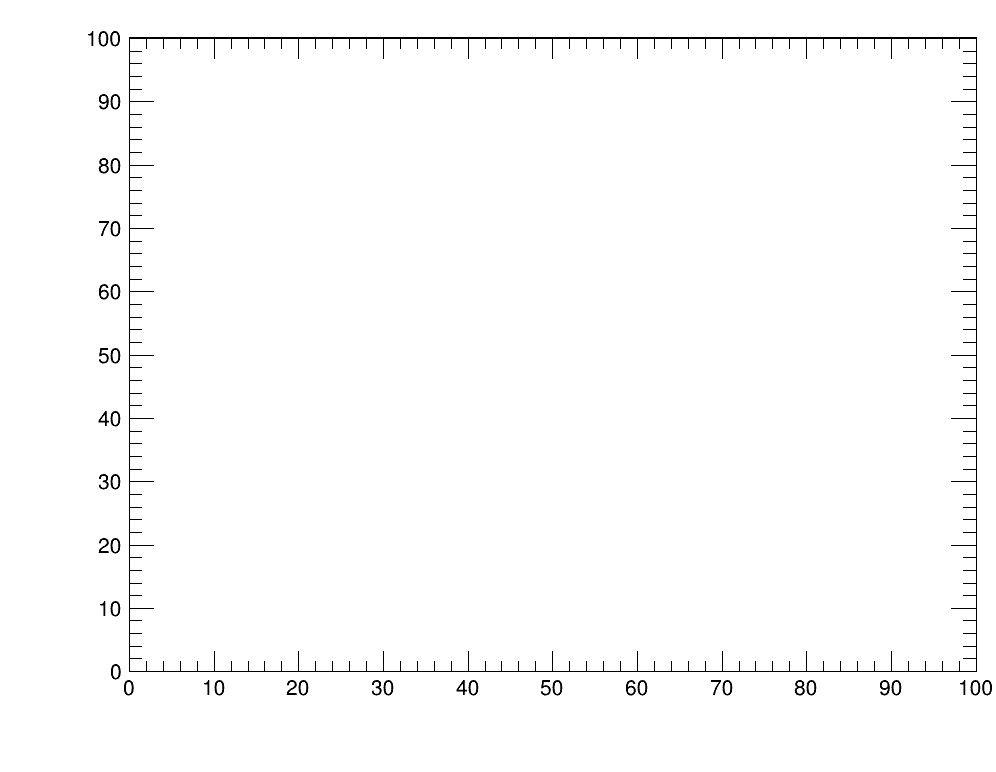

In [320]:
h_test = ROOT.TH2D("","",5,0,100, 5,0,100)

# h_test.Fill(1,1,3)
h_test.Fill(1,100,1)
h_test.Fill(1,100,1)
print(h_test.GetBinContent(1,6))
print(h_test.GetBinError(1,6))
# h_test.Fill(1,1,1)
# h_test.Fill(1,1,1)

c2 = ROOT.TCanvas("","",1000,800)
c2.Draw()
h_test.Draw("TEXT HIST e")

In [ ]:
h_test_2 = ROOT.TH2D("","",5,0,100, 5,0,100)
h_test_3 = ROOT.TH2D("","",5,0,100, 5,0,100)

h_test_2.Fill(1,1,2)
# h_test_2.Fill(1,1,1)
h_test_3.Fill(1,1,1)

h_test_2.Add(h_test_3, -1)

c2 = ROOT.TCanvas("","",1000,800)
c2.Draw()
h_test_2.Draw("TEXT e")

### Final test